# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

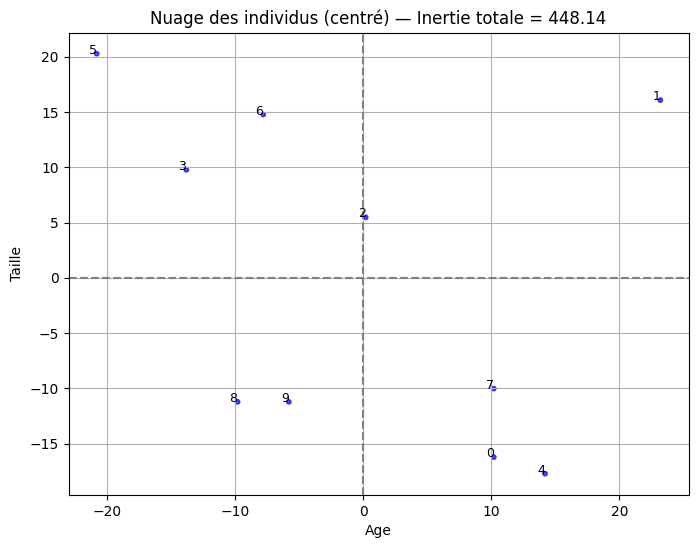

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Charger les données
df = pd.read_csv("data/dataset_caracteristiques.csv")  # index_col=0 si la première colonne est un identifiant
X = df.values  # Matrice des données
n, p = X.shape

# 2. Poids uniformes (si non fournis)
p_i = np.ones(n) / n  # Poids égaux
D = np.diag(p_i)      # Matrice diagonale des poids

# 3. Calcul du centre de gravité (g = X^T D 1)
g = X.T @ p_i

# 4. Centrage pondéré : soustraire le centre à chaque individu
Xc = X - g

# 5. Inertie totale : somme pondérée des carrés des distances au centre
inertie_totale = np.sum(p_i * np.sum(Xc**2, axis=1))

# 6. Visualisation du nuage (en 2D, via les deux premières variables)
plt.figure(figsize=(8, 6))
plt.scatter(Xc[:, 0], Xc[:, 1], s=100 * p_i, c='blue', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title(f"Nuage des individus (centré) — Inertie totale = {inertie_totale:.2f}")
for i, name in enumerate(df.index):
    plt.text(Xc[i, 0], Xc[i, 1], name, fontsize=9, ha='right')
plt.grid(True)
plt.show()



In [10]:
print(D)
print(X)



[[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1]]
[[ 56.  152.3  65.2]
 [ 69.  184.6  76.2]
 [ 46.  174.   71.6]
 [ 32.  178.3  64.6]
 [ 60.  150.8  80.6]
 [ 25.  188.8  57. ]
 [ 38.  183.3  64.6]
 [ 56.  158.5  68.3]
 [ 36.  157.3  72.8]
 [ 40.  157.3  89.3]]
[[ 56.   69.   46.   32.   60.   25.   38.   56.   36.   40. ]
 [152.3 184.6 174.  178.3 150.8 188.8 183.3 158.5 157.3 157.3]
 [ 65.2  76.2  71.6  64.6  80.6  57.   64.6  68.3  72.8  89.3]]
